In [1]:
SensorNum=1 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccY' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
#Learning Parameter
BATCH_SIZE =50

In [3]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [4]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [5]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [6]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/loss/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/loss/')
GlaphDataPath=WORKSPACE_PATH+'/graph/'+DataName+'/loss/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/Time'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/Time')
GlaphDataTimePath=WORKSPACE_PATH+'/graph/'+DataName+'/Time'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [7]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

SampleNum= 16
Overlap= 4
AccY is registed now
Build Complete
(254742,)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 1)
hiden node = 4
CommonName =_edim=4-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
4s - loss: 0.0578 - val_loss: 0.0035
Epoch 2/50
5s - loss: 0.0023 - val_loss: 0.0017
Epoch 3/50
5s - loss: 0.0014 - val_loss: 0.0011
Epoch 4/50
5s - loss: 9.0097e-04 - val_loss: 7.1262e-04
Epoch 5/50
5s - loss: 6.0044e-04 - val_loss: 5.2461e-04
Epoch 6/50
5s - loss: 4.5603e-04 - val_loss: 4.0726e-04
Epoch 7/50
5s - loss: 3.9142e-04 - val_loss: 3.6764e-04
Epoch 8/50
4s - loss: 3.5478e-04 - val_loss: 4.2988e-04
Epoch 9/50
4s - loss: 3.2914e-04 - val_loss: 3.0717e-04
Epoch 10/50
4s - loss: 3.0816e-04 - val_loss: 2.9364e-04
Epoch 11/50
5s - loss: 2.8874e-04 - val_loss: 2.7943e-04
Epoch 12/50
3s - loss: 2.7452e-04 - val_loss: 2.5299e-04
Epoch 13/50
3s - loss: 2.5687e-04 - val_loss: 2.5857e-04
Epoch 14/50
3s - loss: 2.4412e

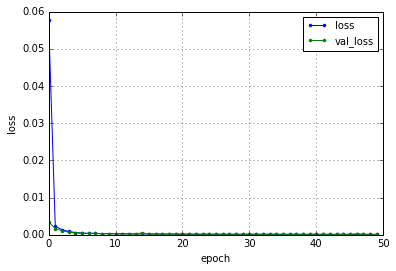

hiden node = 8
CommonName =_edim=8-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
4s - loss: 0.0331 - val_loss: 0.0018
Epoch 2/50
4s - loss: 0.0011 - val_loss: 7.3886e-04
Epoch 3/50
4s - loss: 6.2806e-04 - val_loss: 5.3458e-04
Epoch 4/50
4s - loss: 4.9434e-04 - val_loss: 4.8526e-04
Epoch 5/50
3s - loss: 4.2302e-04 - val_loss: 3.9506e-04
Epoch 6/50
3s - loss: 3.7631e-04 - val_loss: 3.4182e-04
Epoch 7/50
4s - loss: 3.3856e-04 - val_loss: 3.1071e-04
Epoch 8/50
4s - loss: 3.0800e-04 - val_loss: 3.3635e-04
Epoch 9/50
3s - loss: 2.8407e-04 - val_loss: 2.8682e-04
Epoch 10/50
4s - loss: 2.5970e-04 - val_loss: 2.3377e-04
Epoch 11/50
4s - loss: 2.3993e-04 - val_loss: 2.1323e-04
Epoch 12/50
4s - loss: 2.2328e-04 - val_loss: 1.9729e-04
Epoch 13/50
4s - loss: 2.0356e-04 - val_loss: 3.2350e-04
Epoch 14/50
4s - loss: 1.8850e-04 - val_loss: 1.9593e-04
Epoch 15/50
3s - loss: 1.7633e-04 - val_loss: 1.5412e-04
Epoch 16/50
3s - loss: 1.6446e-04 - val_loss: 1.4478e-04
Epoc

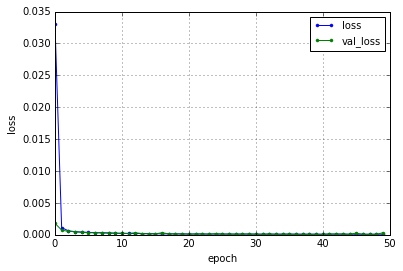

hiden node = 12
CommonName =_edim=12-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
4s - loss: 0.0396 - val_loss: 0.0017
Epoch 2/50
4s - loss: 0.0010 - val_loss: 5.6235e-04
Epoch 3/50
4s - loss: 4.0827e-04 - val_loss: 3.2443e-04
Epoch 4/50
4s - loss: 2.8102e-04 - val_loss: 2.3702e-04
Epoch 5/50
4s - loss: 2.2820e-04 - val_loss: 2.7831e-04
Epoch 6/50
4s - loss: 1.9429e-04 - val_loss: 1.6589e-04
Epoch 7/50
4s - loss: 1.7097e-04 - val_loss: 1.4061e-04
Epoch 8/50
4s - loss: 1.5379e-04 - val_loss: 1.5966e-04
Epoch 9/50
4s - loss: 1.4173e-04 - val_loss: 1.2623e-04
Epoch 10/50
4s - loss: 1.3016e-04 - val_loss: 1.0872e-04
Epoch 11/50
4s - loss: 1.2444e-04 - val_loss: 9.6956e-05
Epoch 12/50
4s - loss: 1.1971e-04 - val_loss: 1.6117e-04
Epoch 13/50
3s - loss: 1.1232e-04 - val_loss: 8.9543e-05
Epoch 14/50
4s - loss: 1.0826e-04 - val_loss: 8.2586e-05
Epoch 15/50
4s - loss: 1.1013e-04 - val_loss: 1.1005e-04
Epoch 16/50
4s - loss: 1.0620e-04 - val_loss: 1.0165e-04
Ep

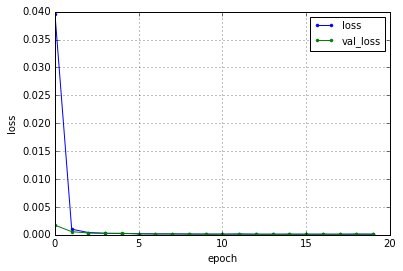

hiden node = 16
CommonName =_edim=16-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
3s - loss: 0.0300 - val_loss: 0.0014
Epoch 2/50
3s - loss: 7.2167e-04 - val_loss: 4.0639e-04
Epoch 3/50
3s - loss: 3.0729e-04 - val_loss: 2.3805e-04
Epoch 4/50
3s - loss: 2.1401e-04 - val_loss: 2.2237e-04
Epoch 5/50
3s - loss: 1.7345e-04 - val_loss: 1.5881e-04
Epoch 6/50
3s - loss: 1.4830e-04 - val_loss: 1.2344e-04
Epoch 7/50
3s - loss: 1.3795e-04 - val_loss: 1.1194e-04
Epoch 8/50
3s - loss: 1.3046e-04 - val_loss: 1.2868e-04
Epoch 9/50
3s - loss: 1.2351e-04 - val_loss: 1.3855e-04
Epoch 10/50
3s - loss: 1.1889e-04 - val_loss: 9.1711e-05
Epoch 11/50
3s - loss: 1.1258e-04 - val_loss: 1.4963e-04
Epoch 12/50
3s - loss: 1.1016e-04 - val_loss: 9.5613e-05
Epoch 13/50
3s - loss: 1.0713e-04 - val_loss: 8.7458e-05
Epoch 14/50
3s - loss: 1.0493e-04 - val_loss: 8.6974e-05
Epoch 15/50
3s - loss: 1.0038e-04 - val_loss: 1.8479e-04
Epoch 16/50
3s - loss: 1.0592e-04 - val_loss: 7.8506e-0

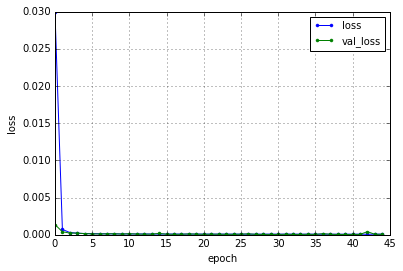

hiden node = 32
CommonName =_edim=32-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
3s - loss: 0.0108 - val_loss: 4.6108e-04
Epoch 2/50
3s - loss: 3.2373e-04 - val_loss: 2.7621e-04
Epoch 3/50
3s - loss: 1.9370e-04 - val_loss: 2.1325e-04
Epoch 4/50
2s - loss: 1.5180e-04 - val_loss: 1.1313e-04
Epoch 5/50
2s - loss: 1.2843e-04 - val_loss: 1.0944e-04
Epoch 6/50
3s - loss: 1.1462e-04 - val_loss: 8.6998e-05
Epoch 7/50
3s - loss: 1.0549e-04 - val_loss: 7.2860e-05
Epoch 8/50
3s - loss: 9.9617e-05 - val_loss: 7.1611e-05
Epoch 9/50
3s - loss: 9.3274e-05 - val_loss: 7.2864e-05
Epoch 10/50
3s - loss: 9.0747e-05 - val_loss: 5.8365e-05
Epoch 11/50
3s - loss: 8.0670e-05 - val_loss: 1.0149e-04
Epoch 12/50
3s - loss: 7.9904e-05 - val_loss: 6.4287e-05
Epoch 13/50
3s - loss: 7.7553e-05 - val_loss: 6.4859e-05
Epoch 14/50
3s - loss: 7.5014e-05 - val_loss: 5.1972e-05
Epoch 15/50
2s - loss: 7.0925e-05 - val_loss: 5.2573e-05
Epoch 16/50
3s - loss: 6.7726e-05 - val_loss: 4.458

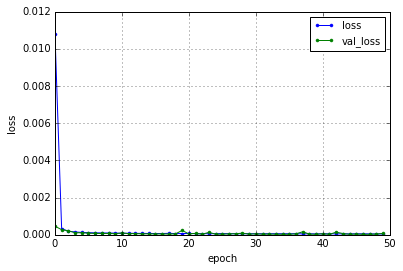

hiden node = 64
CommonName =_edim=64-Window=16-Overlap=4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
3s - loss: 0.0115 - val_loss: 2.9987e-04
Epoch 2/50
3s - loss: 2.2288e-04 - val_loss: 1.4728e-04
Epoch 3/50
3s - loss: 1.4777e-04 - val_loss: 1.3682e-04
Epoch 4/50
3s - loss: 1.2194e-04 - val_loss: 9.0380e-05
Epoch 5/50
2s - loss: 1.1040e-04 - val_loss: 1.0557e-04
Epoch 6/50
2s - loss: 1.0560e-04 - val_loss: 7.5107e-05
Epoch 7/50
3s - loss: 9.8760e-05 - val_loss: 2.3397e-04
Epoch 8/50
3s - loss: 9.4563e-05 - val_loss: 1.1252e-04
Epoch 9/50
3s - loss: 9.5025e-05 - val_loss: 5.9522e-05
Epoch 10/50
3s - loss: 9.3164e-05 - val_loss: 1.0996e-04
Epoch 11/50
3s - loss: 8.5602e-05 - val_loss: 8.6376e-05
Epoch 12/50
3s - loss: 8.4093e-05 - val_loss: 4.5482e-05
Epoch 13/50
3s - loss: 8.3735e-05 - val_loss: 1.7745e-04
Epoch 14/50
3s - loss: 7.6567e-05 - val_loss: 3.9533e-05
Epoch 15/50
3s - loss: 7.0932e-05 - val_loss: 4.5411e-05
Epoch 16/50
2s - loss: 6.8250e-05 - val_loss: 5.183

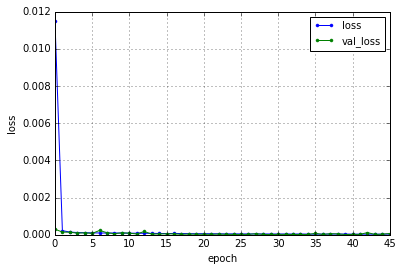

SampleNum= 32
Overlap= 8
AccY is registed now
Build Complete
(254742,)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 1)
hiden node = 4
CommonName =_edim=4-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0830 - val_loss: 0.0112
Epoch 2/50
1s - loss: 0.0070 - val_loss: 0.0050
Epoch 3/50
1s - loss: 0.0043 - val_loss: 0.0037
Epoch 4/50
1s - loss: 0.0032 - val_loss: 0.0028
Epoch 5/50
1s - loss: 0.0024 - val_loss: 0.0021
Epoch 6/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 7/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 8/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 9/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 10/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 11/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 12/50
1s - loss: 0.0011 - val_loss: 0.0012
Epoch 13/50
1s - loss: 0.0010 - val_loss: 9.5665e-04
Epoch 14/50
1s - loss: 9.3824e-04 - val_loss: 8.6545e-04
Epoch 15/50
1s - loss: 8.5976e-04 - val_loss: 8.0

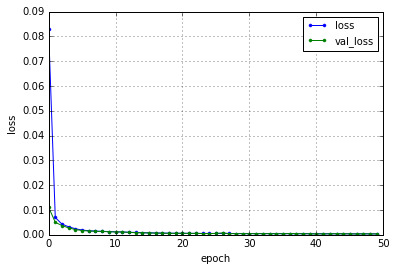

hiden node = 8
CommonName =_edim=8-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0494 - val_loss: 0.0064
Epoch 2/50
1s - loss: 0.0043 - val_loss: 0.0030
Epoch 3/50
1s - loss: 0.0023 - val_loss: 0.0017
Epoch 4/50
1s - loss: 0.0014 - val_loss: 0.0012
Epoch 5/50
1s - loss: 0.0010 - val_loss: 9.9929e-04
Epoch 6/50
1s - loss: 8.4199e-04 - val_loss: 7.6112e-04
Epoch 7/50
1s - loss: 7.2736e-04 - val_loss: 6.5945e-04
Epoch 8/50
1s - loss: 6.5161e-04 - val_loss: 7.5362e-04
Epoch 9/50
1s - loss: 5.8360e-04 - val_loss: 5.3814e-04
Epoch 10/50
1s - loss: 5.4435e-04 - val_loss: 4.8588e-04
Epoch 11/50
1s - loss: 5.0553e-04 - val_loss: 4.8833e-04
Epoch 12/50
1s - loss: 4.9032e-04 - val_loss: 5.1131e-04
Epoch 13/50
1s - loss: 4.5983e-04 - val_loss: 4.1476e-04
Epoch 14/50
1s - loss: 4.3893e-04 - val_loss: 4.2112e-04
Epoch 15/50
1s - loss: 4.3016e-04 - val_loss: 4.6400e-04
Epoch 16/50
1s - loss: 4.1673e-04 - val_loss: 3.9818e-04
Epoch 17/50
1s - loss: 4.011

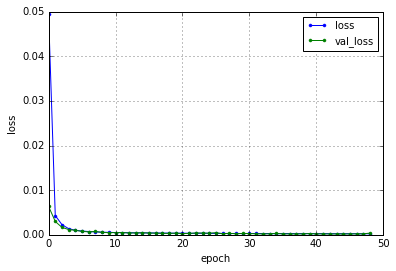

hiden node = 12
CommonName =_edim=12-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0435 - val_loss: 0.0047
Epoch 2/50
1s - loss: 0.0032 - val_loss: 0.0025
Epoch 3/50
1s - loss: 0.0018 - val_loss: 0.0015
Epoch 4/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 5/50
1s - loss: 0.0011 - val_loss: 9.2274e-04
Epoch 6/50
1s - loss: 8.8009e-04 - val_loss: 7.5376e-04
Epoch 7/50
1s - loss: 7.3321e-04 - val_loss: 0.0011
Epoch 8/50
1s - loss: 6.3066e-04 - val_loss: 5.4547e-04
Epoch 9/50
1s - loss: 5.5148e-04 - val_loss: 4.7915e-04
Epoch 10/50
1s - loss: 5.1188e-04 - val_loss: 4.8645e-04
Epoch 11/50
1s - loss: 4.8122e-04 - val_loss: 4.0439e-04
Epoch 12/50
1s - loss: 4.3892e-04 - val_loss: 3.7712e-04
Epoch 13/50
1s - loss: 4.1606e-04 - val_loss: 3.8731e-04
Epoch 14/50
1s - loss: 3.9761e-04 - val_loss: 3.4823e-04
Epoch 15/50
0s - loss: 3.7798e-04 - val_loss: 3.3437e-04
Epoch 16/50
0s - loss: 3.5142e-04 - val_loss: 2.9586e-04
Epoch 17/50
1s - loss: 3.5071e

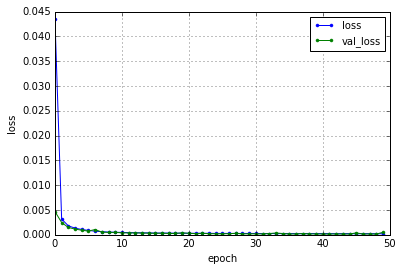

hiden node = 16
CommonName =_edim=16-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0377 - val_loss: 0.0034
Epoch 2/50
1s - loss: 0.0021 - val_loss: 0.0014
Epoch 3/50
1s - loss: 0.0012 - val_loss: 9.8463e-04
Epoch 4/50
1s - loss: 8.5700e-04 - val_loss: 7.2211e-04
Epoch 5/50
1s - loss: 6.9802e-04 - val_loss: 5.9906e-04
Epoch 6/50
1s - loss: 6.1085e-04 - val_loss: 6.0086e-04
Epoch 7/50
1s - loss: 5.4133e-04 - val_loss: 7.5075e-04
Epoch 8/50
1s - loss: 5.0128e-04 - val_loss: 4.3480e-04
Epoch 9/50
1s - loss: 4.8229e-04 - val_loss: 4.5308e-04
Epoch 10/50
1s - loss: 4.3640e-04 - val_loss: 4.2555e-04
Epoch 11/50
1s - loss: 4.1364e-04 - val_loss: 5.4316e-04
Epoch 12/50
1s - loss: 4.1441e-04 - val_loss: 3.4155e-04
Epoch 13/50
1s - loss: 3.8519e-04 - val_loss: 3.0232e-04
Epoch 14/50
1s - loss: 3.5842e-04 - val_loss: 4.2000e-04
Epoch 15/50
0s - loss: 3.4799e-04 - val_loss: 5.7639e-04
Epoch 16/50
1s - loss: 3.1984e-04 - val_loss: 2.5385e-04
Epoch 17/5

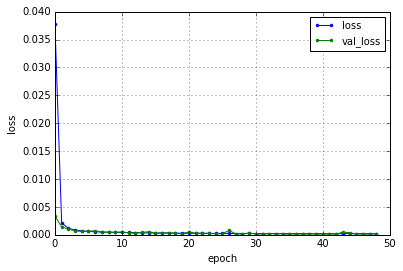

hiden node = 32
CommonName =_edim=32-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0200 - val_loss: 0.0018
Epoch 2/50
1s - loss: 0.0012 - val_loss: 8.2222e-04
Epoch 3/50
1s - loss: 7.1206e-04 - val_loss: 6.7376e-04
Epoch 4/50
1s - loss: 5.4499e-04 - val_loss: 4.4233e-04
Epoch 5/50
1s - loss: 4.6032e-04 - val_loss: 3.8523e-04
Epoch 6/50
1s - loss: 3.9767e-04 - val_loss: 5.7408e-04
Epoch 7/50
1s - loss: 3.8550e-04 - val_loss: 5.0590e-04
Epoch 8/50
1s - loss: 3.3551e-04 - val_loss: 7.9812e-04
Epoch 9/50
1s - loss: 3.2842e-04 - val_loss: 2.8568e-04
Epoch 10/50
1s - loss: 3.1599e-04 - val_loss: 2.3416e-04
Epoch 11/50
1s - loss: 2.9183e-04 - val_loss: 2.1835e-04
Epoch 12/50
1s - loss: 2.8790e-04 - val_loss: 2.4063e-04
Epoch 13/50
1s - loss: 2.9125e-04 - val_loss: 4.4206e-04
Epoch 14/50
1s - loss: 2.6448e-04 - val_loss: 2.4553e-04
Epoch 15/50
1s - loss: 2.7127e-04 - val_loss: 2.6774e-04
Epoch 16/50
1s - loss: 2.5687e-04 - val_loss: 1.8938e-04
Ep

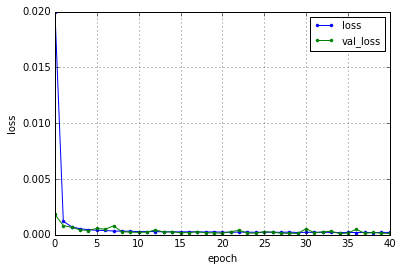

hiden node = 64
CommonName =_edim=64-Window=32-Overlap=8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
1s - loss: 0.0206 - val_loss: 0.0011
Epoch 2/50
1s - loss: 6.8126e-04 - val_loss: 6.3498e-04
Epoch 3/50
1s - loss: 4.1183e-04 - val_loss: 3.2022e-04
Epoch 4/50
1s - loss: 3.2917e-04 - val_loss: 2.7319e-04
Epoch 5/50
1s - loss: 2.9098e-04 - val_loss: 2.2349e-04
Epoch 6/50
1s - loss: 2.6701e-04 - val_loss: 2.1712e-04
Epoch 7/50
1s - loss: 2.5598e-04 - val_loss: 2.5207e-04
Epoch 8/50
1s - loss: 2.2641e-04 - val_loss: 1.9519e-04
Epoch 9/50
1s - loss: 2.1377e-04 - val_loss: 3.0526e-04
Epoch 10/50
1s - loss: 2.1517e-04 - val_loss: 1.6388e-04
Epoch 11/50
1s - loss: 2.0791e-04 - val_loss: 1.1552e-04
Epoch 12/50
1s - loss: 1.8254e-04 - val_loss: 1.1261e-04
Epoch 13/50
1s - loss: 1.8007e-04 - val_loss: 9.9940e-05
Epoch 14/50
1s - loss: 1.7305e-04 - val_loss: 9.5681e-05
Epoch 15/50
1s - loss: 1.6930e-04 - val_loss: 3.2455e-04
Epoch 16/50
1s - loss: 1.7091e-04 - val_loss: 1.1117e-0

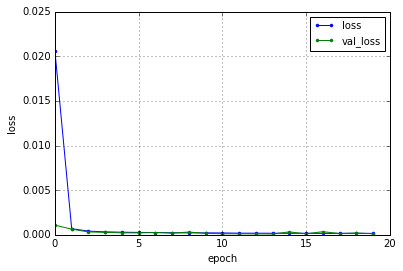

SampleNum= 64
Overlap= 16
AccY is registed now
Build Complete
(254742,)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 1)
hiden node = 4
CommonName =_edim=4-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.1104 - val_loss: 0.0332
Epoch 2/50
1s - loss: 0.0204 - val_loss: 0.0134
Epoch 3/50
1s - loss: 0.0111 - val_loss: 0.0096
Epoch 4/50
1s - loss: 0.0090 - val_loss: 0.0084
Epoch 5/50
1s - loss: 0.0079 - val_loss: 0.0074
Epoch 6/50
1s - loss: 0.0070 - val_loss: 0.0065
Epoch 7/50
1s - loss: 0.0060 - val_loss: 0.0057
Epoch 8/50
1s - loss: 0.0052 - val_loss: 0.0048
Epoch 9/50
1s - loss: 0.0046 - val_loss: 0.0047
Epoch 10/50
1s - loss: 0.0042 - val_loss: 0.0040
Epoch 11/50
1s - loss: 0.0040 - val_loss: 0.0038
Epoch 12/50
1s - loss: 0.0038 - val_loss: 0.0037
Epoch 13/50
1s - loss: 0.0037 - val_loss: 0.0035
Epoch 14/50
1s - loss: 0.0035 - val_loss: 0.0034
Epoch 15/50
1s - loss: 0.0034 - val_loss: 0.0035
Epoch 16/5

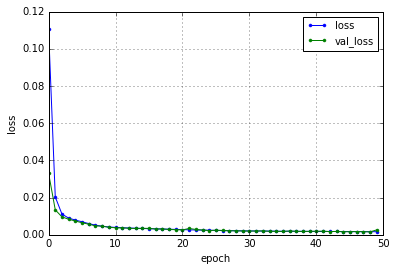

hiden node = 8
CommonName =_edim=8-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0656 - val_loss: 0.0139
Epoch 2/50
1s - loss: 0.0108 - val_loss: 0.0088
Epoch 3/50
1s - loss: 0.0078 - val_loss: 0.0069
Epoch 4/50
1s - loss: 0.0062 - val_loss: 0.0056
Epoch 5/50
1s - loss: 0.0050 - val_loss: 0.0047
Epoch 6/50
1s - loss: 0.0042 - val_loss: 0.0039
Epoch 7/50
1s - loss: 0.0037 - val_loss: 0.0035
Epoch 8/50
1s - loss: 0.0033 - val_loss: 0.0031
Epoch 9/50
1s - loss: 0.0030 - val_loss: 0.0030
Epoch 10/50
1s - loss: 0.0028 - val_loss: 0.0026
Epoch 11/50
1s - loss: 0.0025 - val_loss: 0.0026
Epoch 12/50
1s - loss: 0.0023 - val_loss: 0.0022
Epoch 13/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 14/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 15/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 16/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 17/50
1s - loss: 0.0016 - val_loss: 0.0016
Epoch 18/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 19/50
1s - loss

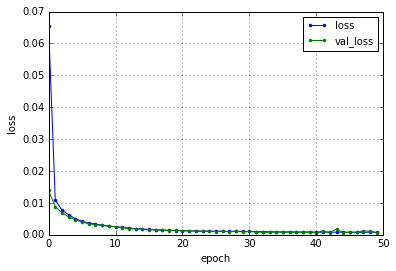

hiden node = 12
CommonName =_edim=12-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0818 - val_loss: 0.0162
Epoch 2/50
1s - loss: 0.0106 - val_loss: 0.0077
Epoch 3/50
1s - loss: 0.0064 - val_loss: 0.0052
Epoch 4/50
1s - loss: 0.0045 - val_loss: 0.0040
Epoch 5/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 6/50
1s - loss: 0.0030 - val_loss: 0.0048
Epoch 7/50
1s - loss: 0.0025 - val_loss: 0.0025
Epoch 8/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 9/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 10/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 11/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 12/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 13/50
1s - loss: 0.0012 - val_loss: 0.0013
Epoch 14/50
1s - loss: 0.0012 - val_loss: 0.0010
Epoch 15/50
1s - loss: 0.0011 - val_loss: 0.0013
Epoch 16/50
1s - loss: 0.0010 - val_loss: 8.7977e-04
Epoch 17/50
1s - loss: 0.0010 - val_loss: 8.9751e-04
Epoch 18/50
1s - loss: 9.1609e-04 - val_loss: 0.0021
Epoch 1

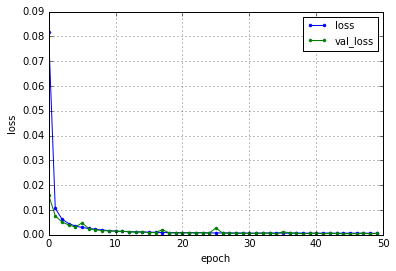

hiden node = 16
CommonName =_edim=16-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0688 - val_loss: 0.0125
Epoch 2/50
1s - loss: 0.0089 - val_loss: 0.0068
Epoch 3/50
1s - loss: 0.0053 - val_loss: 0.0043
Epoch 4/50
1s - loss: 0.0037 - val_loss: 0.0032
Epoch 5/50
1s - loss: 0.0030 - val_loss: 0.0037
Epoch 6/50
1s - loss: 0.0025 - val_loss: 0.0028
Epoch 7/50
1s - loss: 0.0021 - val_loss: 0.0022
Epoch 8/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 9/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 10/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 11/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 12/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 13/50
1s - loss: 0.0011 - val_loss: 9.5463e-04
Epoch 14/50
1s - loss: 0.0010 - val_loss: 8.5758e-04
Epoch 15/50
1s - loss: 9.9144e-04 - val_loss: 8.1115e-04
Epoch 16/50
1s - loss: 9.2131e-04 - val_loss: 7.6643e-04
Epoch 17/50
1s - loss: 8.6506e-04 - val_loss: 0.0012
Epoch 18/50
1s - loss: 8.6244e-04 - val_

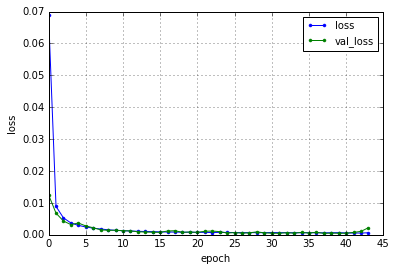

hiden node = 32
CommonName =_edim=32-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0454 - val_loss: 0.0075
Epoch 2/50
1s - loss: 0.0051 - val_loss: 0.0035
Epoch 3/50
1s - loss: 0.0029 - val_loss: 0.0034
Epoch 4/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 5/50
1s - loss: 0.0016 - val_loss: 0.0019
Epoch 6/50
1s - loss: 0.0013 - val_loss: 0.0019
Epoch 7/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 8/50
1s - loss: 0.0010 - val_loss: 0.0011
Epoch 9/50
1s - loss: 0.0010 - val_loss: 7.9154e-04
Epoch 10/50
1s - loss: 8.6187e-04 - val_loss: 7.2579e-04
Epoch 11/50
1s - loss: 8.6820e-04 - val_loss: 6.7064e-04
Epoch 12/50
1s - loss: 8.0873e-04 - val_loss: 7.7430e-04
Epoch 13/50
1s - loss: 8.5572e-04 - val_loss: 5.7172e-04
Epoch 14/50
1s - loss: 7.2931e-04 - val_loss: 6.9246e-04
Epoch 15/50
1s - loss: 6.9893e-04 - val_loss: 8.1889e-04
Epoch 16/50
1s - loss: 7.1886e-04 - val_loss: 0.0011
Epoch 17/50
1s - loss: 6.6400e-04 - val_loss: 4.7945e-04
Epoc

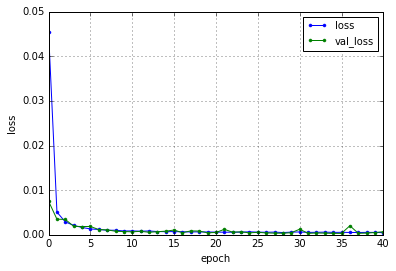

hiden node = 64
CommonName =_edim=64-Window=64-Overlap=16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0375 - val_loss: 0.0047
Epoch 2/50
1s - loss: 0.0030 - val_loss: 0.0021
Epoch 3/50
1s - loss: 0.0017 - val_loss: 0.0014
Epoch 4/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 5/50
1s - loss: 0.0010 - val_loss: 0.0011
Epoch 6/50
1s - loss: 8.4091e-04 - val_loss: 0.0012
Epoch 7/50
1s - loss: 8.5731e-04 - val_loss: 7.8879e-04
Epoch 8/50
1s - loss: 7.3426e-04 - val_loss: 6.2910e-04
Epoch 9/50
1s - loss: 6.5553e-04 - val_loss: 4.9369e-04
Epoch 10/50
1s - loss: 7.3635e-04 - val_loss: 9.3984e-04
Epoch 11/50
1s - loss: 6.5696e-04 - val_loss: 0.0013
Epoch 12/50
1s - loss: 6.8490e-04 - val_loss: 4.2092e-04
Epoch 13/50
1s - loss: 5.7514e-04 - val_loss: 8.4933e-04
Epoch 14/50
1s - loss: 6.0921e-04 - val_loss: 3.8113e-04
Epoch 15/50
1s - loss: 5.3726e-04 - val_loss: 3.5912e-04
Epoch 16/50
1s - loss: 5.6554e-04 - val_loss: 3.9402e-04
Epoch 17/50
1s - loss: 5.1199e-04 - v

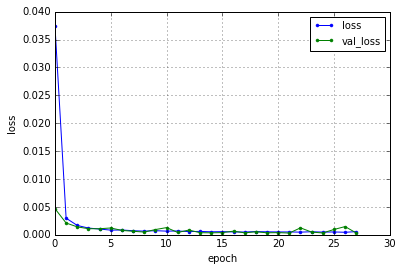

SampleNum= 128
Overlap= 32
AccY is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 4
CommonName =_edim=4-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.2160 - val_loss: 0.1200
Epoch 2/50
0s - loss: 0.0774 - val_loss: 0.0493
Epoch 3/50
0s - loss: 0.0369 - val_loss: 0.0284
Epoch 4/50
0s - loss: 0.0235 - val_loss: 0.0208
Epoch 5/50
0s - loss: 0.0184 - val_loss: 0.0181
Epoch 6/50
0s - loss: 0.0163 - val_loss: 0.0161
Epoch 7/50
0s - loss: 0.0152 - val_loss: 0.0157
Epoch 8/50
0s - loss: 0.0145 - val_loss: 0.0141
Epoch 9/50
0s - loss: 0.0140 - val_loss: 0.0136
Epoch 10/50
0s - loss: 0.0134 - val_loss: 0.0133
Epoch 11/50
0s - loss: 0.0127 - val_loss: 0.0148
Epoch 12/50
0s - loss: 0.0119 - val_loss: 0.0115
Epoch 13/50
0s - loss: 0.0110 - val_loss: 0.0105
Epoch 14/50
0s - loss: 0.0102 - val_loss: 0.0097
Epoch 15/50
0s - loss: 0.0095 - val_loss: 0.0091
Epoch 16/5

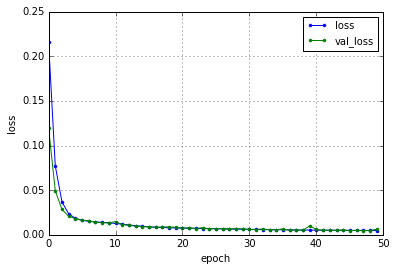

hiden node = 8
CommonName =_edim=8-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1738 - val_loss: 0.0833
Epoch 2/50
0s - loss: 0.0526 - val_loss: 0.0333
Epoch 3/50
0s - loss: 0.0253 - val_loss: 0.0211
Epoch 4/50
0s - loss: 0.0175 - val_loss: 0.0155
Epoch 5/50
0s - loss: 0.0144 - val_loss: 0.0134
Epoch 6/50
0s - loss: 0.0124 - val_loss: 0.0119
Epoch 7/50
0s - loss: 0.0108 - val_loss: 0.0099
Epoch 8/50
0s - loss: 0.0095 - val_loss: 0.0090
Epoch 9/50
0s - loss: 0.0086 - val_loss: 0.0082
Epoch 10/50
0s - loss: 0.0081 - val_loss: 0.0079
Epoch 11/50
0s - loss: 0.0076 - val_loss: 0.0073
Epoch 12/50
0s - loss: 0.0072 - val_loss: 0.0084
Epoch 13/50
0s - loss: 0.0069 - val_loss: 0.0083
Epoch 14/50
0s - loss: 0.0067 - val_loss: 0.0064
Epoch 15/50
0s - loss: 0.0064 - val_loss: 0.0062
Epoch 16/50
0s - loss: 0.0061 - val_loss: 0.0071
Epoch 17/50
0s - loss: 0.0059 - val_loss: 0.0063
Epoch 18/50
0s - loss: 0.0056 - val_loss: 0.0062
Epoch 19/50
0s - loss:

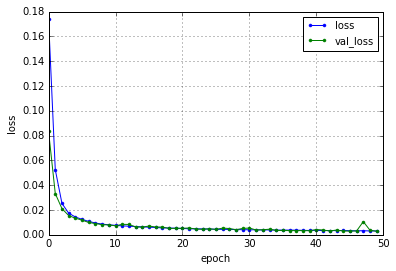

hiden node = 12
CommonName =_edim=12-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1482 - val_loss: 0.0492
Epoch 2/50
0s - loss: 0.0305 - val_loss: 0.0212
Epoch 3/50
0s - loss: 0.0178 - val_loss: 0.0156
Epoch 4/50
0s - loss: 0.0143 - val_loss: 0.0143
Epoch 5/50
0s - loss: 0.0121 - val_loss: 0.0128
Epoch 6/50
0s - loss: 0.0103 - val_loss: 0.0098
Epoch 7/50
0s - loss: 0.0089 - val_loss: 0.0082
Epoch 8/50
0s - loss: 0.0079 - val_loss: 0.0082
Epoch 9/50
0s - loss: 0.0074 - val_loss: 0.0080
Epoch 10/50
0s - loss: 0.0069 - val_loss: 0.0065
Epoch 11/50
0s - loss: 0.0065 - val_loss: 0.0072
Epoch 12/50
0s - loss: 0.0061 - val_loss: 0.0057
Epoch 13/50
0s - loss: 0.0058 - val_loss: 0.0060
Epoch 14/50
0s - loss: 0.0055 - val_loss: 0.0051
Epoch 15/50
0s - loss: 0.0053 - val_loss: 0.0065
Epoch 16/50
0s - loss: 0.0051 - val_loss: 0.0047
Epoch 17/50
0s - loss: 0.0048 - val_loss: 0.0049
Epoch 18/50
0s - loss: 0.0049 - val_loss: 0.0044
Epoch 19/50
0s - los

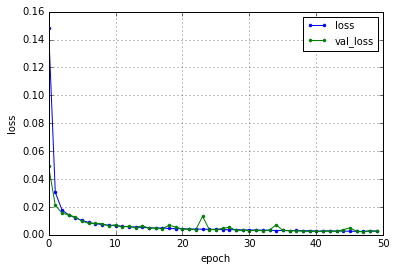

hiden node = 16
CommonName =_edim=16-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1166 - val_loss: 0.0299
Epoch 2/50
0s - loss: 0.0212 - val_loss: 0.0166
Epoch 3/50
0s - loss: 0.0144 - val_loss: 0.0131
Epoch 4/50
0s - loss: 0.0116 - val_loss: 0.0119
Epoch 5/50
0s - loss: 0.0095 - val_loss: 0.0092
Epoch 6/50
0s - loss: 0.0082 - val_loss: 0.0086
Epoch 7/50
0s - loss: 0.0074 - val_loss: 0.0079
Epoch 8/50
0s - loss: 0.0068 - val_loss: 0.0090
Epoch 9/50
0s - loss: 0.0063 - val_loss: 0.0059
Epoch 10/50
0s - loss: 0.0059 - val_loss: 0.0059
Epoch 11/50
0s - loss: 0.0056 - val_loss: 0.0053
Epoch 12/50
0s - loss: 0.0052 - val_loss: 0.0090
Epoch 13/50
0s - loss: 0.0050 - val_loss: 0.0049
Epoch 14/50
0s - loss: 0.0047 - val_loss: 0.0052
Epoch 15/50
0s - loss: 0.0045 - val_loss: 0.0041
Epoch 16/50
0s - loss: 0.0044 - val_loss: 0.0041
Epoch 17/50
0s - loss: 0.0041 - val_loss: 0.0039
Epoch 18/50
0s - loss: 0.0041 - val_loss: 0.0037
Epoch 19/50
0s - los

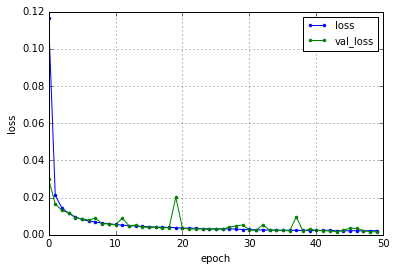

hiden node = 32
CommonName =_edim=32-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0857 - val_loss: 0.0213
Epoch 2/50
0s - loss: 0.0166 - val_loss: 0.0135
Epoch 3/50
0s - loss: 0.0112 - val_loss: 0.0094
Epoch 4/50
0s - loss: 0.0079 - val_loss: 0.0069
Epoch 5/50
0s - loss: 0.0062 - val_loss: 0.0058
Epoch 6/50
0s - loss: 0.0053 - val_loss: 0.0048
Epoch 7/50
0s - loss: 0.0047 - val_loss: 0.0051
Epoch 8/50
0s - loss: 0.0042 - val_loss: 0.0038
Epoch 9/50
0s - loss: 0.0040 - val_loss: 0.0036
Epoch 10/50
0s - loss: 0.0036 - val_loss: 0.0046
Epoch 11/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 12/50
0s - loss: 0.0033 - val_loss: 0.0036
Epoch 13/50
0s - loss: 0.0031 - val_loss: 0.0027
Epoch 14/50
0s - loss: 0.0030 - val_loss: 0.0030
Epoch 15/50
0s - loss: 0.0028 - val_loss: 0.0028
Epoch 16/50
0s - loss: 0.0028 - val_loss: 0.0024
Epoch 17/50
0s - loss: 0.0024 - val_loss: 0.0027
Epoch 18/50
0s - loss: 0.0026 - val_loss: 0.0028
Epoch 19/50
0s - los

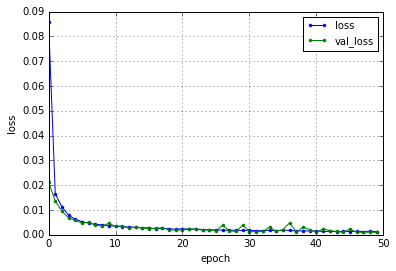

hiden node = 64
CommonName =_edim=64-Window=128-Overlap=32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0635 - val_loss: 0.0150
Epoch 2/50
0s - loss: 0.0107 - val_loss: 0.0089
Epoch 3/50
0s - loss: 0.0065 - val_loss: 0.0054
Epoch 4/50
0s - loss: 0.0049 - val_loss: 0.0062
Epoch 5/50
0s - loss: 0.0040 - val_loss: 0.0036
Epoch 6/50
0s - loss: 0.0034 - val_loss: 0.0039
Epoch 7/50
0s - loss: 0.0031 - val_loss: 0.0032
Epoch 8/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 9/50
0s - loss: 0.0025 - val_loss: 0.0021
Epoch 10/50
0s - loss: 0.0025 - val_loss: 0.0079
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0018
Epoch 12/50
0s - loss: 0.0022 - val_loss: 0.0019
Epoch 13/50
0s - loss: 0.0020 - val_loss: 0.0015
Epoch 14/50
0s - loss: 0.0020 - val_loss: 0.0016
Epoch 15/50
0s - loss: 0.0019 - val_loss: 0.0036
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0013
Epoch 17/50
0s - loss: 0.0017 - val_loss: 0.0012
Epoch 18/50
0s - loss: 0.0016 - val_loss: 0.0038
Epoch 19/50
0s - los

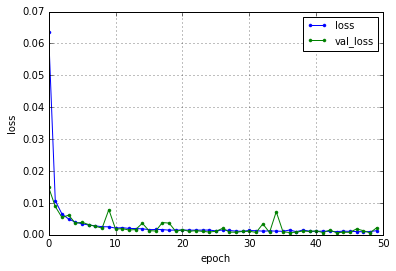

SampleNum= 256
Overlap= 64
AccY is registed now
Build Complete
(254742,)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 1)
hiden node = 4
CommonName =_edim=4-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2663 - val_loss: 0.2124
Epoch 2/50
0s - loss: 0.1673 - val_loss: 0.1301
Epoch 3/50
0s - loss: 0.1067 - val_loss: 0.0866
Epoch 4/50
0s - loss: 0.0730 - val_loss: 0.0611
Epoch 5/50
0s - loss: 0.0531 - val_loss: 0.0460
Epoch 6/50
0s - loss: 0.0412 - val_loss: 0.0369
Epoch 7/50
0s - loss: 0.0340 - val_loss: 0.0317
Epoch 8/50
0s - loss: 0.0295 - val_loss: 0.0281
Epoch 9/50
0s - loss: 0.0268 - val_loss: 0.0256
Epoch 10/50
0s - loss: 0.0252 - val_loss: 0.0252
Epoch 11/50
0s - loss: 0.0238 - val_loss: 0.0236
Epoch 12/50
0s - loss: 0.0228 - val_loss: 0.0223
Epoch 13/50
0s - loss: 0.0219 - val_loss: 0.0220
Epoch 14/50
0s - loss: 0.0212 - val_loss: 0.0205
Epoch 15/50
0s - loss: 0.0207 - val_loss: 0.0198
Epoch 16/5

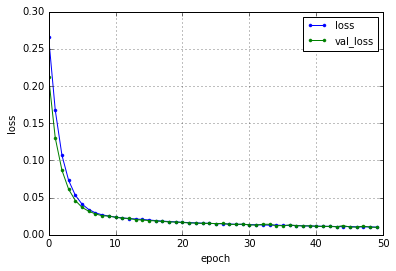

hiden node = 8
CommonName =_edim=8-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2083 - val_loss: 0.1087
Epoch 2/50
0s - loss: 0.0742 - val_loss: 0.0521
Epoch 3/50
0s - loss: 0.0425 - val_loss: 0.0359
Epoch 4/50
0s - loss: 0.0319 - val_loss: 0.0288
Epoch 5/50
0s - loss: 0.0273 - val_loss: 0.0256
Epoch 6/50
0s - loss: 0.0249 - val_loss: 0.0238
Epoch 7/50
0s - loss: 0.0233 - val_loss: 0.0229
Epoch 8/50
0s - loss: 0.0222 - val_loss: 0.0214
Epoch 9/50
0s - loss: 0.0213 - val_loss: 0.0211
Epoch 10/50
0s - loss: 0.0202 - val_loss: 0.0198
Epoch 11/50
0s - loss: 0.0192 - val_loss: 0.0197
Epoch 12/50
0s - loss: 0.0181 - val_loss: 0.0175
Epoch 13/50
0s - loss: 0.0170 - val_loss: 0.0164
Epoch 14/50
0s - loss: 0.0165 - val_loss: 0.0157
Epoch 15/50
0s - loss: 0.0156 - val_loss: 0.0159
Epoch 16/50
0s - loss: 0.0150 - val_loss: 0.0143
Epoch 17/50
0s - loss: 0.0144 - val_loss: 0.0142
Epoch 18/50
0s - loss: 0.0138 - val_loss: 0.0133
Epoch 19/50
0s - loss:

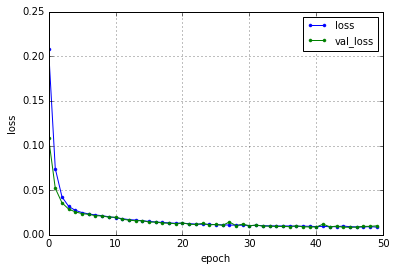

hiden node = 12
CommonName =_edim=12-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1893 - val_loss: 0.0937
Epoch 2/50
0s - loss: 0.0626 - val_loss: 0.0436
Epoch 3/50
0s - loss: 0.0361 - val_loss: 0.0306
Epoch 4/50
0s - loss: 0.0279 - val_loss: 0.0256
Epoch 5/50
0s - loss: 0.0244 - val_loss: 0.0232
Epoch 6/50
0s - loss: 0.0224 - val_loss: 0.0215
Epoch 7/50
0s - loss: 0.0210 - val_loss: 0.0208
Epoch 8/50
0s - loss: 0.0195 - val_loss: 0.0193
Epoch 9/50
0s - loss: 0.0183 - val_loss: 0.0173
Epoch 10/50
0s - loss: 0.0171 - val_loss: 0.0188
Epoch 11/50
0s - loss: 0.0160 - val_loss: 0.0153
Epoch 12/50
0s - loss: 0.0150 - val_loss: 0.0144
Epoch 13/50
0s - loss: 0.0146 - val_loss: 0.0137
Epoch 14/50
0s - loss: 0.0136 - val_loss: 0.0134
Epoch 15/50
0s - loss: 0.0133 - val_loss: 0.0142
Epoch 16/50
0s - loss: 0.0127 - val_loss: 0.0127
Epoch 17/50
0s - loss: 0.0122 - val_loss: 0.0116
Epoch 18/50
0s - loss: 0.0119 - val_loss: 0.0127
Epoch 19/50
0s - los

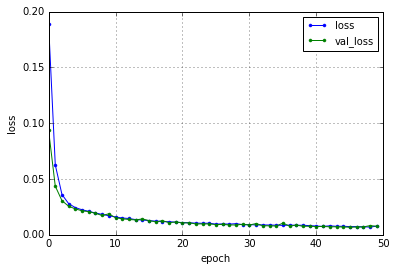

hiden node = 16
CommonName =_edim=16-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1726 - val_loss: 0.0674
Epoch 2/50
0s - loss: 0.0456 - val_loss: 0.0334
Epoch 3/50
0s - loss: 0.0291 - val_loss: 0.0263
Epoch 4/50
0s - loss: 0.0244 - val_loss: 0.0229
Epoch 5/50
0s - loss: 0.0220 - val_loss: 0.0210
Epoch 6/50
0s - loss: 0.0202 - val_loss: 0.0197
Epoch 7/50
0s - loss: 0.0183 - val_loss: 0.0172
Epoch 8/50
0s - loss: 0.0169 - val_loss: 0.0156
Epoch 9/50
0s - loss: 0.0155 - val_loss: 0.0143
Epoch 10/50
0s - loss: 0.0141 - val_loss: 0.0133
Epoch 11/50
0s - loss: 0.0133 - val_loss: 0.0128
Epoch 12/50
0s - loss: 0.0128 - val_loss: 0.0120
Epoch 13/50
0s - loss: 0.0120 - val_loss: 0.0112
Epoch 14/50
0s - loss: 0.0115 - val_loss: 0.0110
Epoch 15/50
0s - loss: 0.0112 - val_loss: 0.0106
Epoch 16/50
0s - loss: 0.0106 - val_loss: 0.0103
Epoch 17/50
0s - loss: 0.0102 - val_loss: 0.0098
Epoch 18/50
0s - loss: 0.0102 - val_loss: 0.0093
Epoch 19/50
0s - los

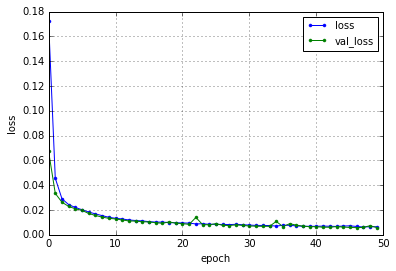

hiden node = 32
CommonName =_edim=32-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1476 - val_loss: 0.0462
Epoch 2/50
0s - loss: 0.0335 - val_loss: 0.0264
Epoch 3/50
0s - loss: 0.0236 - val_loss: 0.0213
Epoch 4/50
0s - loss: 0.0199 - val_loss: 0.0182
Epoch 5/50
0s - loss: 0.0174 - val_loss: 0.0163
Epoch 6/50
0s - loss: 0.0153 - val_loss: 0.0159
Epoch 7/50
0s - loss: 0.0139 - val_loss: 0.0140
Epoch 8/50
0s - loss: 0.0127 - val_loss: 0.0118
Epoch 9/50
0s - loss: 0.0117 - val_loss: 0.0112
Epoch 10/50
0s - loss: 0.0111 - val_loss: 0.0103
Epoch 11/50
0s - loss: 0.0101 - val_loss: 0.0097
Epoch 12/50
0s - loss: 0.0098 - val_loss: 0.0096
Epoch 13/50
0s - loss: 0.0095 - val_loss: 0.0109
Epoch 14/50
0s - loss: 0.0091 - val_loss: 0.0082
Epoch 15/50
0s - loss: 0.0092 - val_loss: 0.0078
Epoch 16/50
0s - loss: 0.0082 - val_loss: 0.0093
Epoch 17/50
0s - loss: 0.0078 - val_loss: 0.0071
Epoch 18/50
0s - loss: 0.0082 - val_loss: 0.0074
Epoch 19/50
0s - los

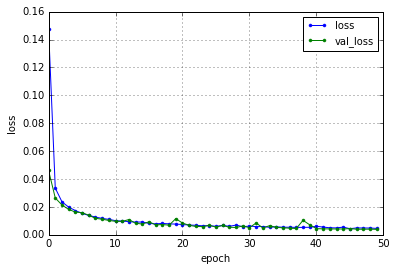

hiden node = 64
CommonName =_edim=64-Window=256-Overlap=64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1026 - val_loss: 0.0288
Epoch 2/50
0s - loss: 0.0239 - val_loss: 0.0202
Epoch 3/50
0s - loss: 0.0179 - val_loss: 0.0156
Epoch 4/50
0s - loss: 0.0142 - val_loss: 0.0129
Epoch 5/50
0s - loss: 0.0117 - val_loss: 0.0112
Epoch 6/50
0s - loss: 0.0102 - val_loss: 0.0094
Epoch 7/50
0s - loss: 0.0094 - val_loss: 0.0085
Epoch 8/50
0s - loss: 0.0086 - val_loss: 0.0079
Epoch 9/50
0s - loss: 0.0080 - val_loss: 0.0072
Epoch 10/50
0s - loss: 0.0076 - val_loss: 0.0101
Epoch 11/50
0s - loss: 0.0070 - val_loss: 0.0065
Epoch 12/50
0s - loss: 0.0071 - val_loss: 0.0063
Epoch 13/50
0s - loss: 0.0069 - val_loss: 0.0059
Epoch 14/50
0s - loss: 0.0062 - val_loss: 0.0060
Epoch 15/50
0s - loss: 0.0060 - val_loss: 0.0056
Epoch 16/50
0s - loss: 0.0058 - val_loss: 0.0051
Epoch 17/50
0s - loss: 0.0060 - val_loss: 0.0049
Epoch 18/50
0s - loss: 0.0055 - val_loss: 0.0090
Epoch 19/50
0s - los

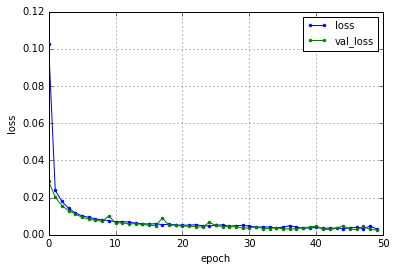

SampleNum= 512
Overlap= 128
AccY is registed now
Build Complete
(254742,)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 1)
hiden node = 4
CommonName =_edim=4-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2779 - val_loss: 0.2449
Epoch 2/50
0s - loss: 0.2150 - val_loss: 0.1870
Epoch 3/50
0s - loss: 0.1669 - val_loss: 0.1479
Epoch 4/50
0s - loss: 0.1336 - val_loss: 0.1198
Epoch 5/50
0s - loss: 0.1092 - val_loss: 0.0988
Epoch 6/50
0s - loss: 0.0908 - val_loss: 0.0830
Epoch 7/50
0s - loss: 0.0769 - val_loss: 0.0710
Epoch 8/50
0s - loss: 0.0665 - val_loss: 0.0619
Epoch 9/50
0s - loss: 0.0584 - val_loss: 0.0550
Epoch 10/50
0s - loss: 0.0522 - val_loss: 0.0496
Epoch 11/50
0s - loss: 0.0476 - val_loss: 0.0460
Epoch 12/50
0s - loss: 0.0441 - val_loss: 0.0431
Epoch 13/50
0s - loss: 0.0413 - val_loss: 0.0403
Epoch 14/50
0s - loss: 0.0392 - val_loss: 0.0381
Epoch 15/50
0s - loss: 0.0372 - val_loss: 0.0366
Epoch 16

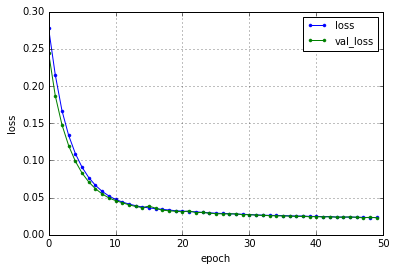

hiden node = 8
CommonName =_edim=8-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2690 - val_loss: 0.2126
Epoch 2/50
0s - loss: 0.1689 - val_loss: 0.1324
Epoch 3/50
0s - loss: 0.1111 - val_loss: 0.0926
Epoch 4/50
0s - loss: 0.0807 - val_loss: 0.0701
Epoch 5/50
0s - loss: 0.0630 - val_loss: 0.0564
Epoch 6/50
0s - loss: 0.0520 - val_loss: 0.0480
Epoch 7/50
0s - loss: 0.0451 - val_loss: 0.0422
Epoch 8/50
0s - loss: 0.0405 - val_loss: 0.0386
Epoch 9/50
0s - loss: 0.0372 - val_loss: 0.0360
Epoch 10/50
0s - loss: 0.0352 - val_loss: 0.0360
Epoch 11/50
0s - loss: 0.0337 - val_loss: 0.0325
Epoch 12/50
0s - loss: 0.0321 - val_loss: 0.0328
Epoch 13/50
0s - loss: 0.0313 - val_loss: 0.0306
Epoch 14/50
0s - loss: 0.0305 - val_loss: 0.0293
Epoch 15/50
0s - loss: 0.0297 - val_loss: 0.0285
Epoch 16/50
0s - loss: 0.0288 - val_loss: 0.0278
Epoch 17/50
0s - loss: 0.0281 - val_loss: 0.0271
Epoch 18/50
0s - loss: 0.0276 - val_loss: 0.0270
Epoch 19/50
0s - loss

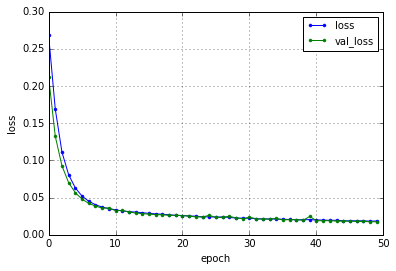

hiden node = 12
CommonName =_edim=12-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2538 - val_loss: 0.1878
Epoch 2/50
0s - loss: 0.1437 - val_loss: 0.1082
Epoch 3/50
0s - loss: 0.0890 - val_loss: 0.0731
Epoch 4/50
0s - loss: 0.0636 - val_loss: 0.0555
Epoch 5/50
0s - loss: 0.0502 - val_loss: 0.0457
Epoch 6/50
0s - loss: 0.0427 - val_loss: 0.0400
Epoch 7/50
0s - loss: 0.0383 - val_loss: 0.0366
Epoch 8/50
0s - loss: 0.0356 - val_loss: 0.0347
Epoch 9/50
0s - loss: 0.0341 - val_loss: 0.0328
Epoch 10/50
0s - loss: 0.0326 - val_loss: 0.0326
Epoch 11/50
0s - loss: 0.0316 - val_loss: 0.0309
Epoch 12/50
0s - loss: 0.0313 - val_loss: 0.0300
Epoch 13/50
0s - loss: 0.0308 - val_loss: 0.0292
Epoch 14/50
0s - loss: 0.0298 - val_loss: 0.0300
Epoch 15/50
0s - loss: 0.0290 - val_loss: 0.0286
Epoch 16/50
0s - loss: 0.0283 - val_loss: 0.0275
Epoch 17/50
0s - loss: 0.0283 - val_loss: 0.0266
Epoch 18/50
0s - loss: 0.0271 - val_loss: 0.0280
Epoch 19/50
0s - lo

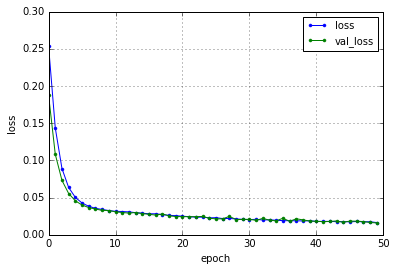

hiden node = 16
CommonName =_edim=16-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2280 - val_loss: 0.1449
Epoch 2/50
0s - loss: 0.1053 - val_loss: 0.0767
Epoch 3/50
0s - loss: 0.0635 - val_loss: 0.0530
Epoch 4/50
0s - loss: 0.0474 - val_loss: 0.0425
Epoch 5/50
0s - loss: 0.0398 - val_loss: 0.0376
Epoch 6/50
0s - loss: 0.0356 - val_loss: 0.0340
Epoch 7/50
0s - loss: 0.0332 - val_loss: 0.0320
Epoch 8/50
0s - loss: 0.0315 - val_loss: 0.0319
Epoch 9/50
0s - loss: 0.0301 - val_loss: 0.0298
Epoch 10/50
0s - loss: 0.0293 - val_loss: 0.0283
Epoch 11/50
0s - loss: 0.0283 - val_loss: 0.0272
Epoch 12/50
0s - loss: 0.0283 - val_loss: 0.0273
Epoch 13/50
0s - loss: 0.0270 - val_loss: 0.0268
Epoch 14/50
0s - loss: 0.0265 - val_loss: 0.0257
Epoch 15/50
0s - loss: 0.0250 - val_loss: 0.0244
Epoch 16/50
0s - loss: 0.0251 - val_loss: 0.0238
Epoch 17/50
0s - loss: 0.0244 - val_loss: 0.0230
Epoch 18/50
0s - loss: 0.0242 - val_loss: 0.0226
Epoch 19/50
0s - lo

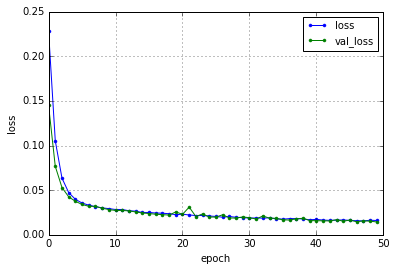

hiden node = 32
CommonName =_edim=32-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2180 - val_loss: 0.1202
Epoch 2/50
0s - loss: 0.0803 - val_loss: 0.0553
Epoch 3/50
0s - loss: 0.0464 - val_loss: 0.0399
Epoch 4/50
0s - loss: 0.0367 - val_loss: 0.0340
Epoch 5/50
0s - loss: 0.0326 - val_loss: 0.0314
Epoch 6/50
0s - loss: 0.0304 - val_loss: 0.0292
Epoch 7/50
0s - loss: 0.0287 - val_loss: 0.0285
Epoch 8/50
0s - loss: 0.0275 - val_loss: 0.0300
Epoch 9/50
0s - loss: 0.0262 - val_loss: 0.0269
Epoch 10/50
0s - loss: 0.0255 - val_loss: 0.0286
Epoch 11/50
0s - loss: 0.0247 - val_loss: 0.0232
Epoch 12/50
0s - loss: 0.0227 - val_loss: 0.0242
Epoch 13/50
0s - loss: 0.0229 - val_loss: 0.0216
Epoch 14/50
0s - loss: 0.0220 - val_loss: 0.0220
Epoch 15/50
0s - loss: 0.0206 - val_loss: 0.0198
Epoch 16/50
0s - loss: 0.0198 - val_loss: 0.0198
Epoch 17/50
0s - loss: 0.0211 - val_loss: 0.0210
Epoch 18/50
0s - loss: 0.0197 - val_loss: 0.0180
Epoch 19/50
0s - lo

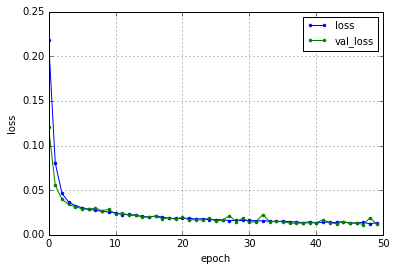

hiden node = 64
CommonName =_edim=64-Window=512-Overlap=128
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1734 - val_loss: 0.0627
Epoch 2/50
0s - loss: 0.0452 - val_loss: 0.0361
Epoch 3/50
0s - loss: 0.0332 - val_loss: 0.0308
Epoch 4/50
0s - loss: 0.0293 - val_loss: 0.0279
Epoch 5/50
0s - loss: 0.0268 - val_loss: 0.0255
Epoch 6/50
0s - loss: 0.0246 - val_loss: 0.0236
Epoch 7/50
0s - loss: 0.0229 - val_loss: 0.0225
Epoch 8/50
0s - loss: 0.0212 - val_loss: 0.0206
Epoch 9/50
0s - loss: 0.0201 - val_loss: 0.0191
Epoch 10/50
0s - loss: 0.0188 - val_loss: 0.0184
Epoch 11/50
0s - loss: 0.0183 - val_loss: 0.0209
Epoch 12/50
0s - loss: 0.0180 - val_loss: 0.0168
Epoch 13/50
0s - loss: 0.0171 - val_loss: 0.0182
Epoch 14/50
0s - loss: 0.0169 - val_loss: 0.0153
Epoch 15/50
0s - loss: 0.0153 - val_loss: 0.0162
Epoch 16/50
0s - loss: 0.0161 - val_loss: 0.0225
Epoch 17/50
0s - loss: 0.0144 - val_loss: 0.0155
Epoch 18/50
0s - loss: 0.0164 - val_loss: 0.0153
Epoch 19/50
0s - lo

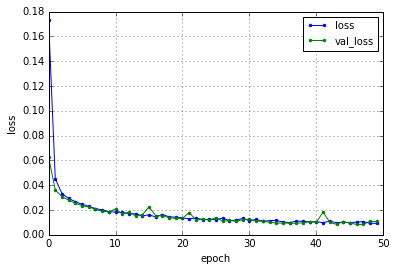

SampleNum= 1024
Overlap= 256
AccY is registed now
Build Complete
(254742,)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 1)
hiden node = 4
CommonName =_edim=4-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2932 - val_loss: 0.2797
Epoch 2/50
0s - loss: 0.2671 - val_loss: 0.2534
Epoch 3/50
0s - loss: 0.2420 - val_loss: 0.2298
Epoch 4/50
0s - loss: 0.2199 - val_loss: 0.2094
Epoch 5/50
0s - loss: 0.2009 - val_loss: 0.1919
Epoch 6/50
0s - loss: 0.1845 - val_loss: 0.1765
Epoch 7/50
0s - loss: 0.1700 - val_loss: 0.1630
Epoch 8/50
0s - loss: 0.1572 - val_loss: 0.1509
Epoch 9/50
0s - loss: 0.1457 - val_loss: 0.1400
Epoch 10/50
0s - loss: 0.1354 - val_loss: 0.1302
Epoch 11/50
0s - loss: 0.1260 - val_loss: 0.1214
Epoch 12/50
0s - loss: 0.1176 - val_loss: 0.1134
Epoch 13/50
0s - loss: 0.1099 - val_loss: 0.1062
Epoch 14/50
0s - loss: 0.1031 - val_loss: 0.0997
Epoch 15/50
0s - loss: 0.0969 - val_loss: 0.0939
Epoch 16/

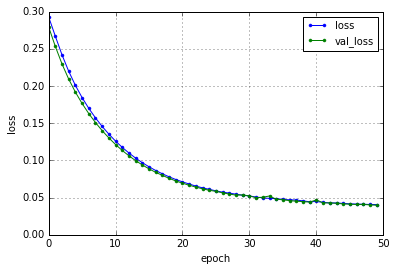

hiden node = 8
CommonName =_edim=8-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2903 - val_loss: 0.2692
Epoch 2/50
0s - loss: 0.2482 - val_loss: 0.2257
Epoch 3/50
0s - loss: 0.2086 - val_loss: 0.1908
Epoch 4/50
0s - loss: 0.1776 - val_loss: 0.1640
Epoch 5/50
0s - loss: 0.1538 - val_loss: 0.1431
Epoch 6/50
0s - loss: 0.1348 - val_loss: 0.1260
Epoch 7/50
0s - loss: 0.1193 - val_loss: 0.1121
Epoch 8/50
0s - loss: 0.1066 - val_loss: 0.1007
Epoch 9/50
0s - loss: 0.0961 - val_loss: 0.0912
Epoch 10/50
0s - loss: 0.0874 - val_loss: 0.0832
Epoch 11/50
0s - loss: 0.0800 - val_loss: 0.0766
Epoch 12/50
0s - loss: 0.0740 - val_loss: 0.0711
Epoch 13/50
0s - loss: 0.0688 - val_loss: 0.0665
Epoch 14/50
0s - loss: 0.0646 - val_loss: 0.0624
Epoch 15/50
0s - loss: 0.0609 - val_loss: 0.0599
Epoch 16/50
0s - loss: 0.0581 - val_loss: 0.0572
Epoch 17/50
0s - loss: 0.0555 - val_loss: 0.0540
Epoch 18/50
0s - loss: 0.0533 - val_loss: 0.0522
Epoch 19/50
0s - loss:

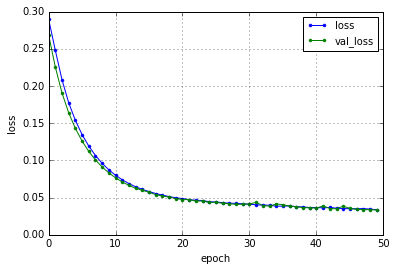

hiden node = 12
CommonName =_edim=12-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2836 - val_loss: 0.2551
Epoch 2/50
0s - loss: 0.2287 - val_loss: 0.2008
Epoch 3/50
0s - loss: 0.1802 - val_loss: 0.1597
Epoch 4/50
0s - loss: 0.1456 - val_loss: 0.1313
Epoch 5/50
0s - loss: 0.1210 - val_loss: 0.1106
Epoch 6/50
0s - loss: 0.1030 - val_loss: 0.0952
Epoch 7/50
0s - loss: 0.0895 - val_loss: 0.0835
Epoch 8/50
0s - loss: 0.0792 - val_loss: 0.0746
Epoch 9/50
0s - loss: 0.0711 - val_loss: 0.0675
Epoch 10/50
0s - loss: 0.0648 - val_loss: 0.0619
Epoch 11/50
0s - loss: 0.0598 - val_loss: 0.0575
Epoch 12/50
0s - loss: 0.0560 - val_loss: 0.0541
Epoch 13/50
0s - loss: 0.0528 - val_loss: 0.0512
Epoch 14/50
0s - loss: 0.0504 - val_loss: 0.0490
Epoch 15/50
0s - loss: 0.0483 - val_loss: 0.0473
Epoch 16/50
0s - loss: 0.0467 - val_loss: 0.0455
Epoch 17/50
0s - loss: 0.0451 - val_loss: 0.0445
Epoch 18/50
0s - loss: 0.0439 - val_loss: 0.0434
Epoch 19/50
0s - los

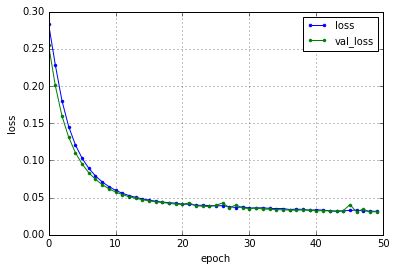

hiden node = 16
CommonName =_edim=16-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2806 - val_loss: 0.2451
Epoch 2/50
0s - loss: 0.2118 - val_loss: 0.1788
Epoch 3/50
0s - loss: 0.1572 - val_loss: 0.1365
Epoch 4/50
0s - loss: 0.1228 - val_loss: 0.1094
Epoch 5/50
0s - loss: 0.1002 - val_loss: 0.0909
Epoch 6/50
0s - loss: 0.0845 - val_loss: 0.0780
Epoch 7/50
0s - loss: 0.0734 - val_loss: 0.0686
Epoch 8/50
0s - loss: 0.0654 - val_loss: 0.0620
Epoch 9/50
0s - loss: 0.0594 - val_loss: 0.0574
Epoch 10/50
0s - loss: 0.0550 - val_loss: 0.0530
Epoch 11/50
0s - loss: 0.0517 - val_loss: 0.0499
Epoch 12/50
0s - loss: 0.0489 - val_loss: 0.0475
Epoch 13/50
0s - loss: 0.0471 - val_loss: 0.0456
Epoch 14/50
0s - loss: 0.0450 - val_loss: 0.0444
Epoch 15/50
0s - loss: 0.0438 - val_loss: 0.0440
Epoch 16/50
0s - loss: 0.0428 - val_loss: 0.0421
Epoch 17/50
0s - loss: 0.0415 - val_loss: 0.0409
Epoch 18/50
0s - loss: 0.0409 - val_loss: 0.0400
Epoch 19/50
0s - los

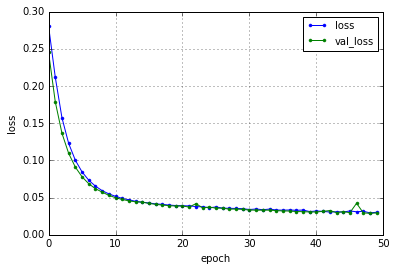

hiden node = 32
CommonName =_edim=32-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2603 - val_loss: 0.2003
Epoch 2/50
0s - loss: 0.1577 - val_loss: 0.1206
Epoch 3/50
0s - loss: 0.1016 - val_loss: 0.0849
Epoch 4/50
0s - loss: 0.0756 - val_loss: 0.0671
Epoch 5/50
0s - loss: 0.0618 - val_loss: 0.0569
Epoch 6/50
0s - loss: 0.0538 - val_loss: 0.0507
Epoch 7/50
0s - loss: 0.0487 - val_loss: 0.0466
Epoch 8/50
0s - loss: 0.0454 - val_loss: 0.0440
Epoch 9/50
0s - loss: 0.0432 - val_loss: 0.0424
Epoch 10/50
0s - loss: 0.0414 - val_loss: 0.0403
Epoch 11/50
0s - loss: 0.0401 - val_loss: 0.0397
Epoch 12/50
0s - loss: 0.0390 - val_loss: 0.0412
Epoch 13/50
0s - loss: 0.0381 - val_loss: 0.0372
Epoch 14/50
0s - loss: 0.0370 - val_loss: 0.0371
Epoch 15/50
0s - loss: 0.0370 - val_loss: 0.0356
Epoch 16/50
0s - loss: 0.0363 - val_loss: 0.0374
Epoch 17/50
0s - loss: 0.0357 - val_loss: 0.0359
Epoch 18/50
0s - loss: 0.0346 - val_loss: 0.0337
Epoch 19/50
0s - los

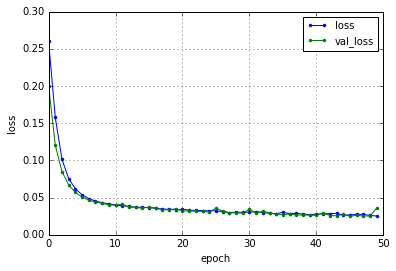

hiden node = 64
CommonName =_edim=64-Window=1024-Overlap=256
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2325 - val_loss: 0.1474
Epoch 2/50
0s - loss: 0.1063 - val_loss: 0.0762
Epoch 3/50
0s - loss: 0.0645 - val_loss: 0.0551
Epoch 4/50
0s - loss: 0.0508 - val_loss: 0.0468
Epoch 5/50
0s - loss: 0.0448 - val_loss: 0.0427
Epoch 6/50
0s - loss: 0.0415 - val_loss: 0.0401
Epoch 7/50
0s - loss: 0.0393 - val_loss: 0.0384
Epoch 8/50
0s - loss: 0.0378 - val_loss: 0.0369
Epoch 9/50
0s - loss: 0.0365 - val_loss: 0.0359
Epoch 10/50
0s - loss: 0.0353 - val_loss: 0.0347
Epoch 11/50
0s - loss: 0.0343 - val_loss: 0.0337
Epoch 12/50
0s - loss: 0.0335 - val_loss: 0.0350
Epoch 13/50
0s - loss: 0.0334 - val_loss: 0.0338
Epoch 14/50
0s - loss: 0.0318 - val_loss: 0.0319
Epoch 15/50
0s - loss: 0.0314 - val_loss: 0.0306
Epoch 16/50
0s - loss: 0.0316 - val_loss: 0.0317
Epoch 17/50
0s - loss: 0.0298 - val_loss: 0.0291
Epoch 18/50
0s - loss: 0.0295 - val_loss: 0.0286
Epoch 19/50
0s - los

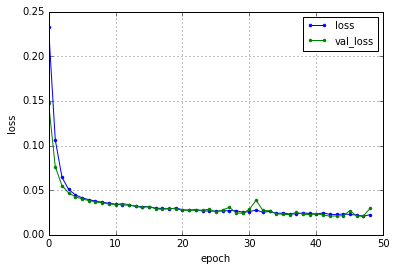

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    print "SampleNum= "+str(SampleNum)
    print "Overlap= "+str(Overlap)
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        CommonName = '_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)
        print "CommonName ="+CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()